# NYC Motor Vehicle Collisions — Time of Day Analysis (Preliminary Project Update)

**Authors:**
Adan Valadez
Liam O'Herlihy
Tasneem Khokha

**Goal:** Investigate whether *time of day* correlates with crash frequency and severity in NYC.
This analysis-focused notebook includes:
- dataset acquisition (NYC Open Data)
- clear problem statement and target measures
- feature selection (temporal & contextual features)
- preprocessing and cleaning steps
- exploratory data analysis and visualizations focused on time-of-day patterns
- preliminary aggregation and statistical checks

In [ ]:
# Cell 1 — Setup: imports and download parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pandas.tseries.holiday import USFederalHolidayCalendar as USCal


sns.set(style='whitegrid')

SAMPLE_LIMIT = 100000  # set to None to show full dataset
DATA_URL = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv"

print('Notebook ready. SAMPLE_LIMIT =', SAMPLE_LIMIT)

Notebook ready. SAMPLE_LIMIT = 100000


## Problem statement

We will analyze whether **time of day** correlates with the **frequency** and **severity** of motor vehicle collisions in NYC.  
Specifically:

- Primary question (descriptive / inferential): *How does crash frequency vary by hour of the day and day of the week?*  
- Secondary question (severity): *Do crashes occurring at certain hours have higher injury or fatality rates?*  

**Target measures used in this analysis:**

- Crash **count** aggregated by hour / weekday (main descriptive target)
- Injury rate (mean number of persons injured per crash) by hour
- Fatality rate (proportion of crashes with >=1 person killed) by hour

In [ ]:
# Cell 2 — Download / Load the data
df = pd.read_csv(DATA_URL, nrows=SAMPLE_LIMIT, low_memory=False)
print(df.shape)
print(df.head())



(1000, 29)
                crash_date crash_time   borough  zip_code  latitude  \
0  2021-09-11T00:00:00.000       2:39       NaN       NaN       NaN   
1  2022-03-26T00:00:00.000      11:45       NaN       NaN       NaN   
2  2023-11-01T00:00:00.000       1:29  BROOKLYN   11230.0  40.62179   
3  2022-06-29T00:00:00.000       6:55       NaN       NaN       NaN   
4  2022-09-21T00:00:00.000      13:21       NaN       NaN       NaN   

   longitude                       location           on_street_name  \
0        NaN                            NaN    WHITESTONE EXPRESSWAY   
1        NaN                            NaN  QUEENSBORO BRIDGE UPPER   
2 -73.970024  \n,  \n(40.62179, -73.970024)            OCEAN PARKWAY   
3        NaN                            NaN       THROGS NECK BRIDGE   
4        NaN                            NaN          BROOKLYN BRIDGE   

  off_street_name cross_street_name  ...  contributing_factor_vehicle_2  \
0       20 AVENUE               NaN  ...              

In [ ]:
# Cell 3 -  Preprocessing & feature engineering (temporal focus)

# Build a proper datetime
date_col = 'crash_date'
time_col = 'crash_time'

dt = pd.to_datetime(
    df[date_col].astype(str) + ' ' + df[time_col].astype(str),
    errors='coerce'
)

# Add hour / weekday
df = df.assign(hour=dt.dt.hour.astype('Int64'), weekday=dt.dt.day_name())

# Counts by hour (0–23)
hour_counts = (
    df.groupby('hour', dropna=True)
      .size()
      .reindex(range(24), fill_value=0)
)
print(hour_counts)


hour
0     46
1     22
2     18
3     16
4     15
5     13
6     31
7     20
8     52
9     45
10    42
11    56
12    59
13    52
14    51
15    63
16    58
17    73
18    55
19    46
20    44
21    48
22    38
23    37
dtype: int64


/tmp/ipython-input-102103261.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(


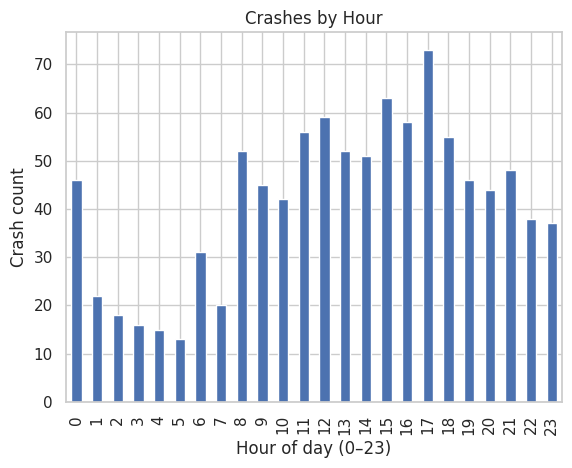

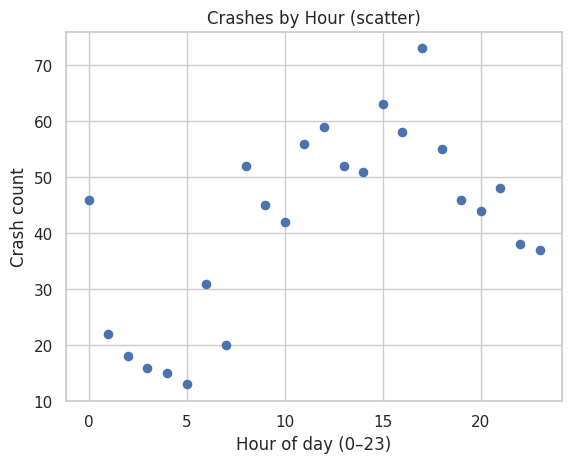

In [ ]:
# Cell 4 Exploratory plots: crash frequency by hour and day of week
# Plot bar
hour_counts.plot(kind="bar")
plt.xlabel("Hour of day (0–23)")
plt.ylabel("Crash count")
plt.title("Crashes by Hour")
plt.show()

#Plot scatter
plt.figure()
plt.scatter(hour_counts.index, hour_counts.values, s=35)
plt.xlabel("Hour of day (0–23)")
plt.ylabel("Crash count")
plt.title("Crashes by Hour (scatter)")
plt.show()

In [ ]:
# Cell 5 — Injury and fatality rates by hour

In [ ]:
# Cell 6 — Simple statistical check: are late-night hours riskier?